# Assignment Python 2

# Background

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:
* BOROUGH : A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
* BLOCK; LOT :The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
* BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: : The type of building at various points in time.


Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:
* Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
* This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.


## Import Libraries

In [3]:
import pandas as pd # primary data structure library
import numpy as np # useful for many scientific computing in Python
%matplotlib inline 
import matplotlib.pyplot as plt
import string
import seaborn as sns
import datetime
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
df = pd.read_csv('/Users/ASUS/Hacktiv8/data/nyc-rolling-sales.csv', skipinitialspace=True)
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,NaN,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,NaN,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,NaN,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,NaN,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,NaN,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,NaN,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,NaN,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,NaN,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,NaN,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            83810 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   EASE-MENT                       0 non-null      float64
 8   BUILDING CLASS AT PRESENT       83810 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT NUMBER                19052 non-null  object 
 11  ZIP CODE                        84548 non-null  int64  
 12  RESIDENTIAL UNITS               

In [6]:
df.shape

(84548, 22)

In [7]:
df.isnull().sum().sort_values(ascending=False)

EASE-MENT                         84548
APARTMENT NUMBER                  65496
TAX CLASS AT PRESENT                738
BUILDING CLASS AT PRESENT           738
Unnamed: 0                            0
COMMERCIAL UNITS                      0
SALE PRICE                            0
BUILDING CLASS AT TIME OF SALE        0
TAX CLASS AT TIME OF SALE             0
YEAR BUILT                            0
GROSS SQUARE FEET                     0
LAND SQUARE FEET                      0
TOTAL UNITS                           0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
BOROUGH                               0
ADDRESS                               0
LOT                                   0
BLOCK                                 0
BUILDING CLASS CATEGORY               0
NEIGHBORHOOD                          0
SALE DATE                             0
dtype: int64

In [8]:
# drop'Unnamed: 0' karena kolom tidak terkait dengan proses analitis
df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
# Kolom 'EASE-MENT' kosong dan dapat dihapus
df.drop('EASE-MENT', axis=1, inplace=True)


In [10]:
# drop kolom tidak releva ke statistical data analysis
df.drop(labels=['ADDRESS','APARTMENT NUMBER', 'ZIP CODE'], axis=1, inplace=True)

In [11]:
#'SALE PRICE' harus numerik, nilai yang hilang akan ubah ke NaN
df['SALE PRICE']= pd.to_numeric(df['SALE PRICE'], errors='coerce')

# 'LAND SQUARE FEET' dan 'GROSS SQUARE FEET' harus numerik
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')

# 'SALE DATE' harus tanggal waktu
df['SALE DATE']=pd.to_datetime(df['SALE DATE'], errors='coerce')

# kolom disini harus bersifat kategoris
categorical = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT',
         'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categorical:
    df[col] = df[col].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  int64         
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            83810 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       83810 non-null  category      
 7   RESIDENTIAL UNITS               84548 non-null  int64         
 8   COMMERCIAL UNITS                84548 non-null  int64         
 9   TOTAL UNITS                     84548 non-null  int64         
 10  LAND SQUARE FEET                58296 non-null  float64       
 11  GR

In [13]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21


In [14]:
sum(df.duplicated())

959

In [15]:
df=df.drop_duplicates(df.columns, keep='last')

In [16]:
sum(df.duplicated())

0

In [17]:
missing_value = df.isnull().sum()/len(df)*100
print(pd.DataFrame([missing_value[missing_value>0], pd.Series(df.isnull().sum()[df.isnull().sum()>1000])],
                  index=['percent missing', 'num of missing']))

                 TAX CLASS AT PRESENT  BUILDING CLASS AT PRESENT  \
percent missing              0.882891                   0.882891   
num of missing                    NaN                        NaN   

                 LAND SQUARE FEET  GROSS SQUARE FEET    SALE PRICE  
percent missing          31.04954          32.638266     16.837144  
num of missing        25954.00000       27282.000000  14074.000000  


terdapat sekitar 30% missing value yang terdapat pada LAND and GROSS SQUARE FEET, dan terdapat sekitar 17% missing value pada column SALE PRICE.  

In [18]:
df['SALE PRICE'].describe()

count    6.951500e+04
mean     1.282005e+06
std      1.143784e+07
min      0.000000e+00
25%      2.300000e+05
50%      5.345810e+05
75%      9.500000e+05
max      2.210000e+09
Name: SALE PRICE, dtype: float64

karena ada banyak nilai nan di kolom 'SALE PRICE', Plot data dan lihat outliernya

In [19]:
# hapus semua nilai null
df=df[df['SALE PRICE'].notnull()]
df=df[df['LAND SQUARE FEET'].notnull()]
df=df[df['GROSS SQUARE FEET'].notnull()]

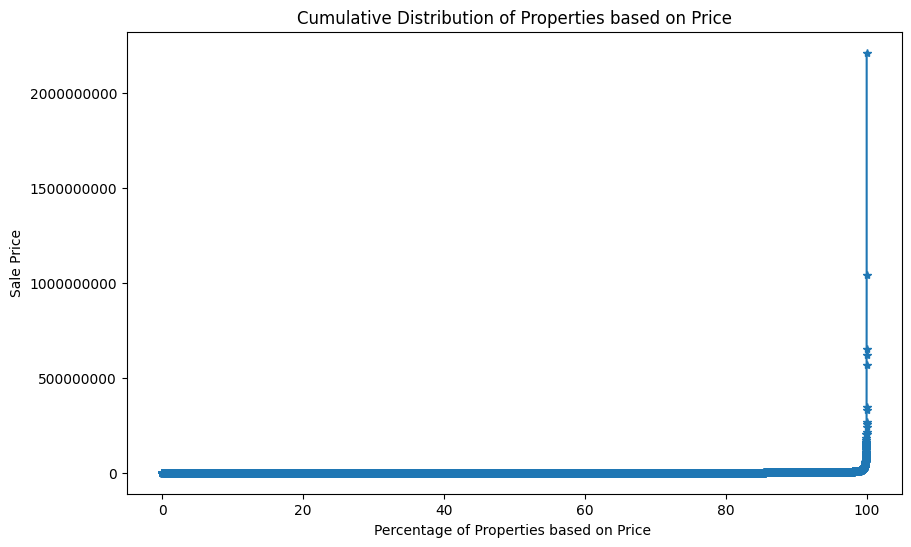

In [20]:
# get data property proportion
x= df[['SALE PRICE']].sort_values(by='SALE PRICE').reset_index()
x['PROPERTY PROPORTION']= 1
x['PROPERTY PROPORTION']= x['PROPERTY PROPORTION'].cumsum()
x['PROPERTY PROPORTION'] = 100 * x['PROPERTY PROPORTION']/len(x['PROPERTY PROPORTION'])

# set size for the plot
plt.figure(figsize=(10,6))

# plot the data
plt.plot(x['PROPERTY PROPORTION'], x['SALE PRICE'], linestyle=None, marker='*')
plt.title("Cumulative Distribution of Properties based on Price")
plt.xlabel("Percentage of Properties based on Price ")
plt.ylabel("Sale Price")
plt.ticklabel_format(style='plain',axis='y')
plt.show()

Untuk menghilangkan outliers kita bisa mengambil data antara 100.000 USD sampai 5000.000 USD

In [21]:
df= df[(df['SALE PRICE']>100000) & (df['SALE PRICE']<5000000)]

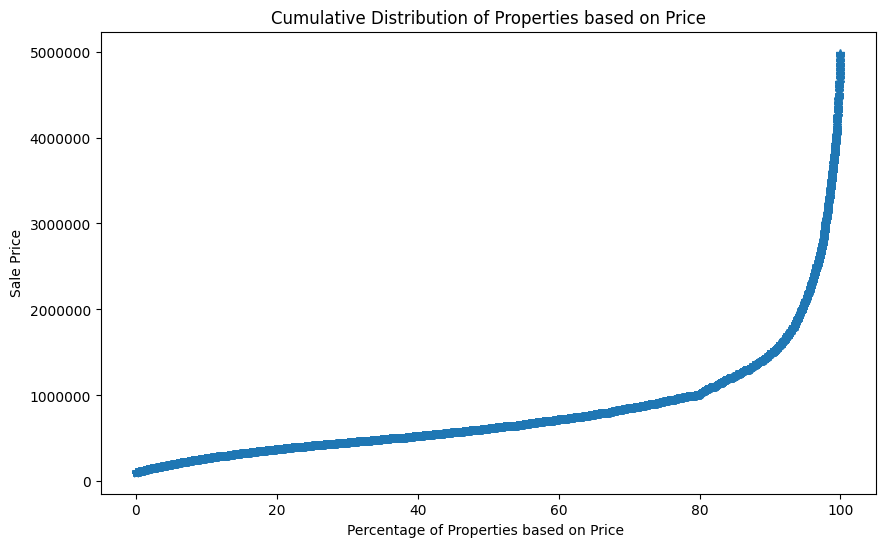

In [22]:
# lakukan hal yang sama seperti sebelumnya untuk mendapatkan proporsi properti data dan memplot datanya, lalu lihat hasilnya
x = df[['SALE PRICE']].sort_values(by='SALE PRICE').reset_index()
x['PROPERTY PROPORTION']= 1
x['PROPERTY PROPORTION']= x['PROPERTY PROPORTION'].cumsum()
x['PROPERTY PROPORTION'] = 100 * x['PROPERTY PROPORTION']/len(x['PROPERTY PROPORTION'])

plt.figure(figsize=(10,6))

plt.plot(x['PROPERTY PROPORTION'], x['SALE PRICE'], linestyle=None, marker='*')
plt.title("Cumulative Distribution of Properties based on Price")
plt.xlabel("Percentage of Properties based on Price ")
plt.ylabel("Sale Price")
plt.ticklabel_format(style='plain',axis='y')
plt.show()


Data distribusi sudah tidak ada outliers

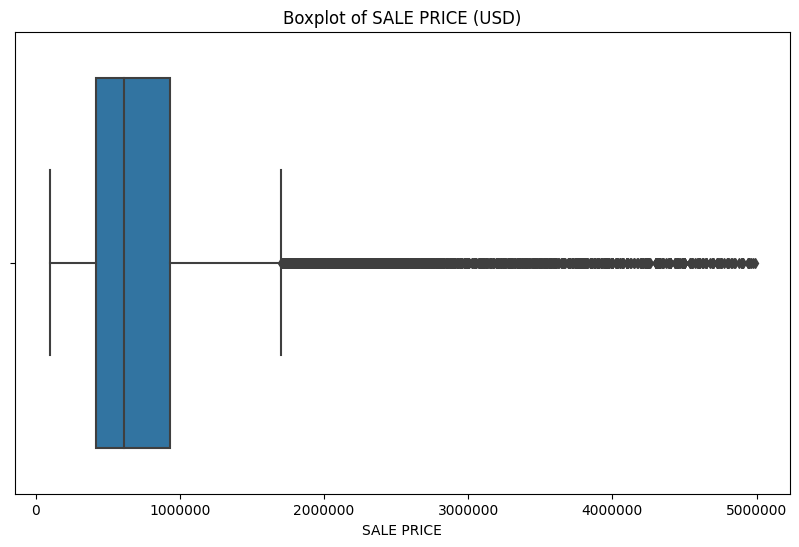

In [23]:
# plot curve menggunakan boxplot untuk melihat tampilan lain dari data
plt.figure(figsize=(10,6))
sns.boxplot(x='SALE PRICE', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title("Boxplot of SALE PRICE (USD)")
plt.show()


ploting menggunakan kurva boxplot dapat kita lihat sudah tidak ada outliers, data sudah lebih baik

In [24]:
mean = df['SALE PRICE'].mean()
median= df['SALE PRICE'].median()
print(mean)
print(median)

795972.4573388677
615000.0


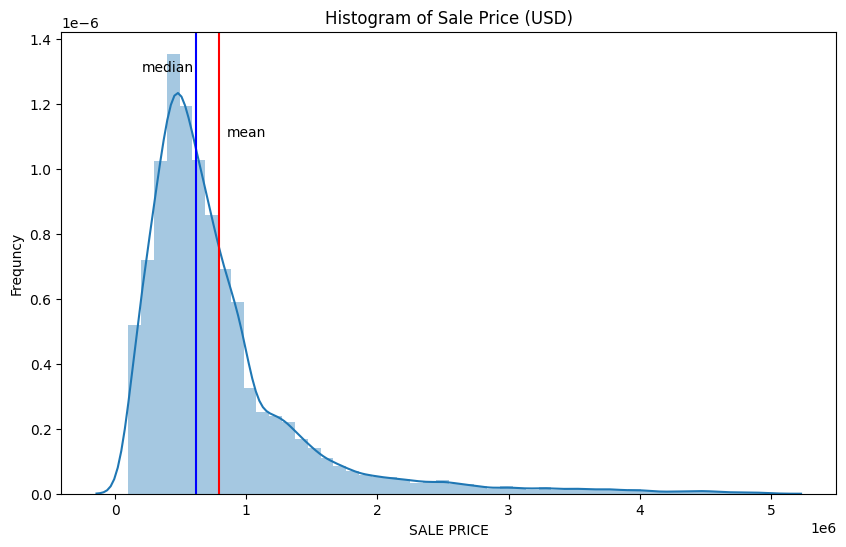

In [25]:
# melihat distribution of the data, apakah data tersebut skewness atau normal distribution
plt.figure(figsize=(10,6))
sns.distplot(df['SALE PRICE'])
plt.title('Histogram of Sale Price (USD)')
plt.ylabel("Frequncy")
plt.axvline(df[(df['SALE PRICE']>100000) & (df['SALE PRICE'] < 5000000)]['SALE PRICE'].mean(), c='red')
plt.axvline(df[(df['SALE PRICE']>100000) & (df['SALE PRICE'] < 5000000)]['SALE PRICE'].median(), c='blue')
plt.text(200000,0.0000013, "median")
plt.text(850000,0.0000011, "mean")
plt.show()

Sebaran data diatas menunjukkan adanya positive skewness karena nilai Mean lebih besar daripada Median

0.14759631798190956


<Axes: xlabel='SALE PRICE', ylabel='Density'>

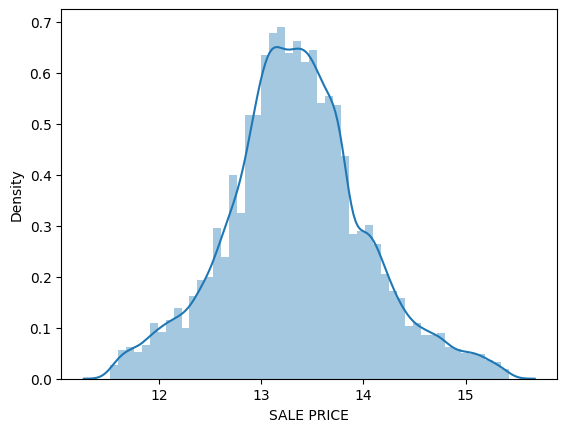

In [26]:
# normalize the data
df['SALE PRICE']=np.log(df['SALE PRICE'])
print(df['SALE PRICE'].skew())
sns.distplot(df['SALE PRICE'])

Data distribusi sudah tidak terdapat skewness yang berarti sebaran data sudah normal

In [27]:
missing_value = df.isnull().sum()/len(df)*100
print(pd.DataFrame([missing_value[missing_value>0], pd.Series(df.isnull().sum()[df.isnull().sum()>1000])],
                  index=['percent missing', 'num of missing']))

                 TAX CLASS AT PRESENT  BUILDING CLASS AT PRESENT
percent missing              0.755217                   0.755217
num of missing                    NaN                        NaN


In [28]:
df.agg(['skew','kurtosis']).transpose()

,skew,kurtosis
BOROUGH,0.060230,-0.518042
BLOCK,0.758528,0.107331
LOT,3.626522,19.779558
RESIDENTIAL UNITS,128.899393,20119.231037
COMMERCIAL UNITS,184.035857,34125.601480
TOTAL UNITS,112.755305,14064.921502
LAND SQUARE FEET,115.753599,15633.848977
GROSS SQUARE FEET,143.790609,23843.112936
YEAR BUILT,-4.272412,16.401786
SALE PRICE,0.147596,0.296787


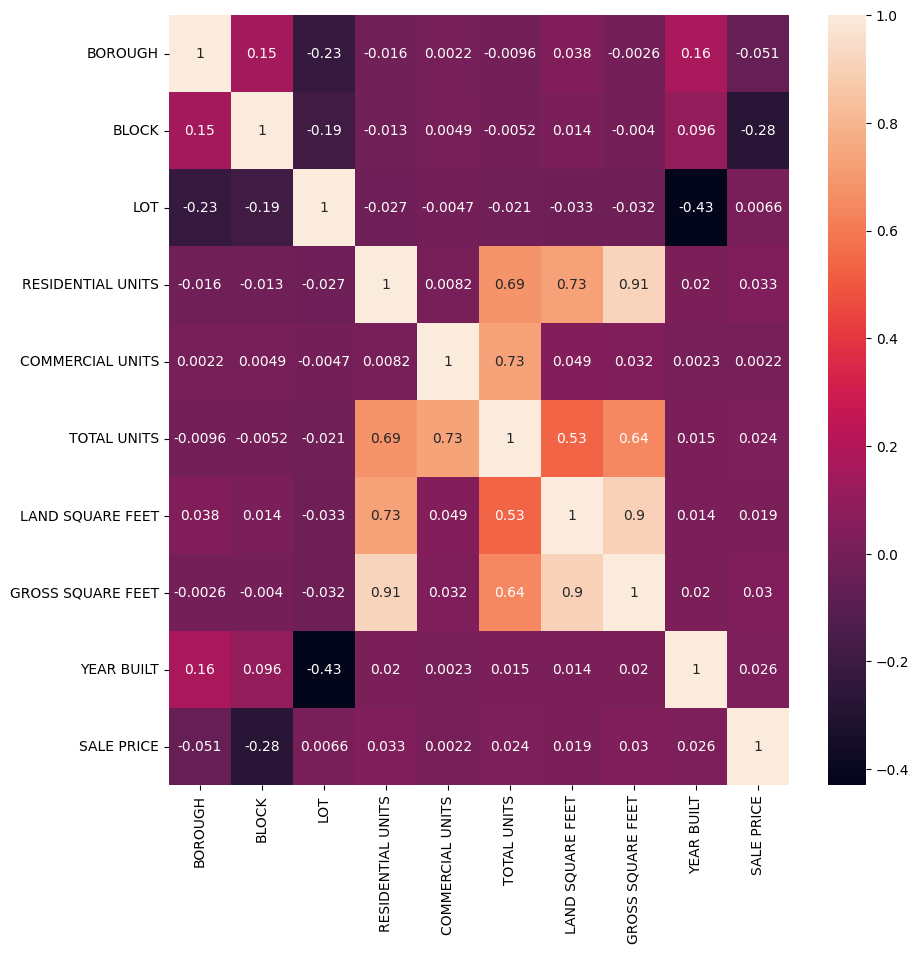

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [30]:
df.describe()

,BOROUGH,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,3.469200e+04,3.469200e+04,34692.000000,34692.000000
mean,3.431454,5256.627609,225.418166,1.722270,0.156434,1.880837,2.829399e+03,2.072700e+03,1856.344489,13.346163
std,0.916571,3632.323973,476.608559,11.362364,12.188705,16.731229,2.823059e+04,2.212514e+04,410.320004,0.680275
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,11.519901
25%,3.000000,2337.000000,21.000000,1.000000,0.000000,1.000000,1.360000e+03,8.740000e+02,1920.000000,12.938441
50%,3.000000,4836.000000,45.000000,1.000000,0.000000,1.000000,2.190000e+03,1.520000e+03,1935.000000,13.329378
75%,4.000000,7360.000000,96.000000,2.000000,0.000000,2.000000,3.140000e+03,2.250000e+03,1963.000000,13.742940
max,5.000000,16319.000000,7501.000000,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,15.422227


Dari deskripsi statistik data diatas, dataset terlihat banyak memiliki outliers terutama data yang berhubungan dengan properti unit

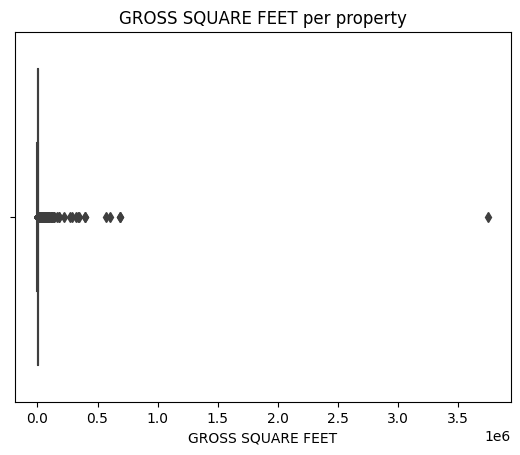

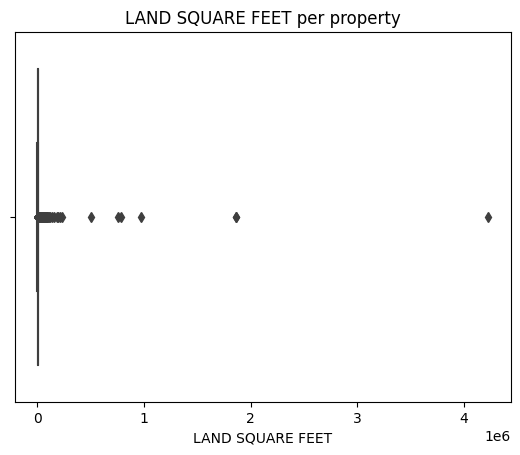

In [31]:
sns.boxplot(x='GROSS SQUARE FEET',data=df)
plt.title('GROSS SQUARE FEET per property')
plt.show()

sns.boxplot(x='LAND SQUARE FEET',data=df)
plt.title('LAND SQUARE FEET per property')
plt.show()

In [32]:
# untuk menghilangkan outliers, ambil data kurang dari 20000
df = df[df['GROSS SQUARE FEET'] < 20000]
df = df[df['LAND SQUARE FEET'] < 20000]


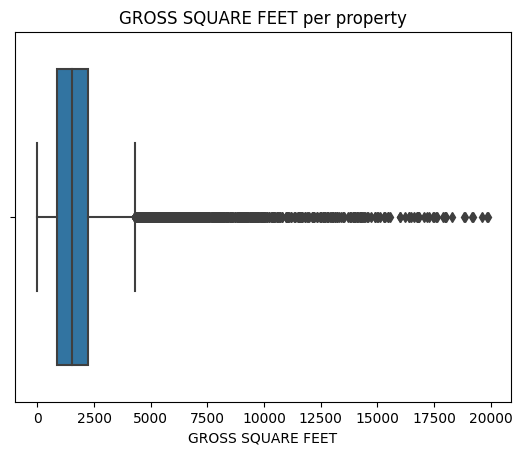

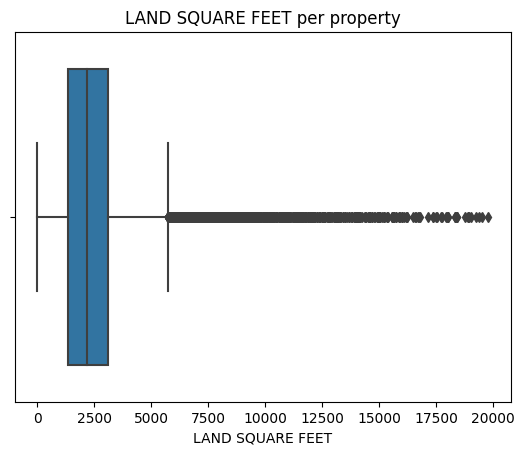

In [33]:
sns.boxplot(x='GROSS SQUARE FEET',data=df)
plt.title('GROSS SQUARE FEET per property')
plt.show()

sns.boxplot(x='LAND SQUARE FEET',data=df)
plt.title('LAND SQUARE FEET per property')
plt.show()


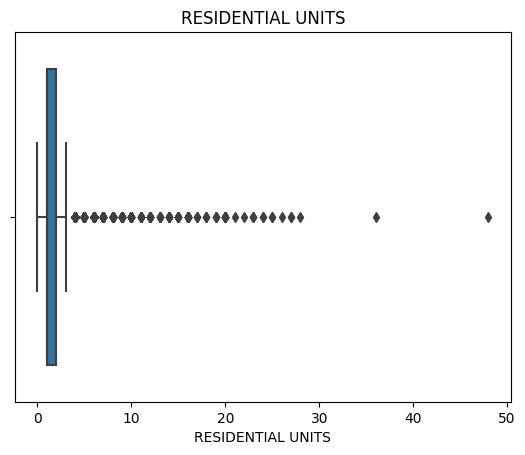

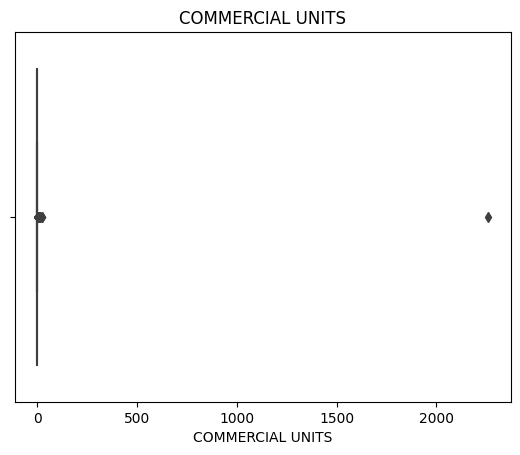

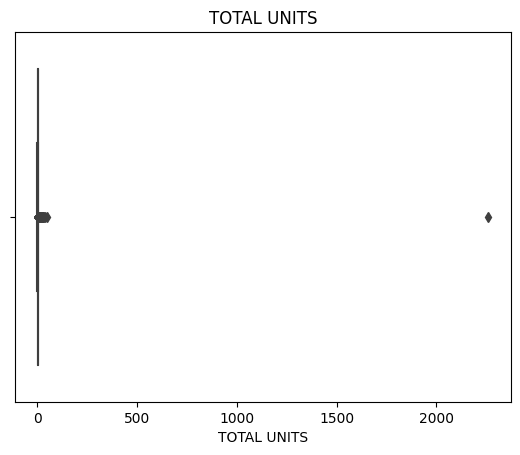

In [34]:
# ploting menggunakan boxplot untuk melihat outliers
sns.boxplot(x='RESIDENTIAL UNITS',data=df)
plt.title('RESIDENTIAL UNITS')
plt.show()

sns.boxplot(x='COMMERCIAL UNITS',data=df)
plt.title('COMMERCIAL UNITS')
plt.show()

sns.boxplot(x='TOTAL UNITS',data=df)
plt.title('TOTAL UNITS')
plt.show()

In [35]:
# hapus data properti sisa yang memiliki nilai 0 unit total
df = df[(df['TOTAL UNITS'] > 0) & (df['TOTAL UNITS'] < 30)]

# hapus data dimana 'COMMERCIAL UNITS' + 'RESIDENTIAL UNITS' tidak sama dengan total units
df = df[df['TOTAL UNITS'] == df['COMMERCIAL UNITS'] + df['RESIDENTIAL UNITS']]

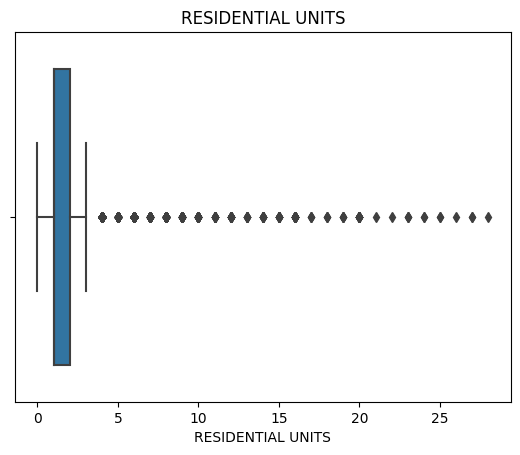

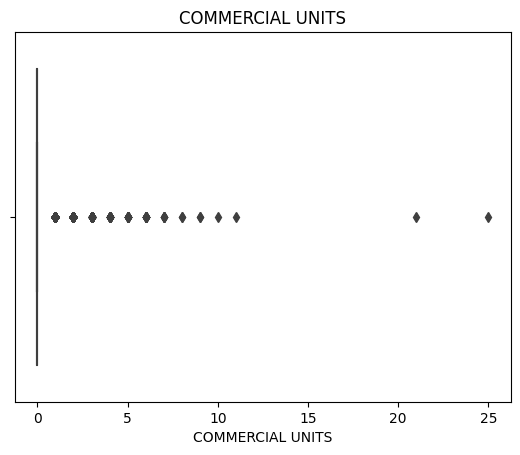

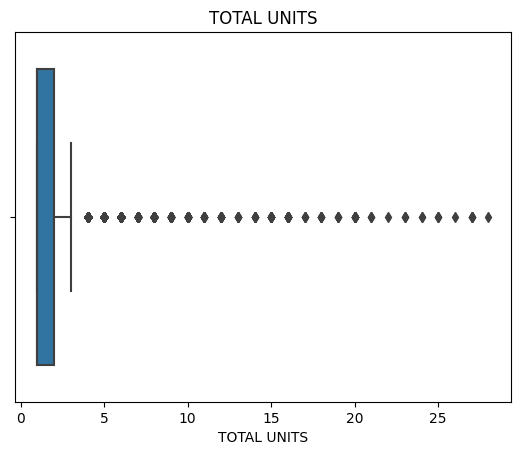

In [36]:
sns.boxplot(x='RESIDENTIAL UNITS',data=df)
plt.title('RESIDENTIAL UNITS')
plt.show()

sns.boxplot(x='COMMERCIAL UNITS',data=df)
plt.title('COMMERCIAL UNITS')
plt.show()

sns.boxplot(x='TOTAL UNITS',data=df)
plt.title('TOTAL UNITS')
plt.show()

distribusi data sudah jauh lebih baik dari sebelumnya

In [37]:
df['BOROUGH'] = df['BOROUGH'].astype(str)
df['BOROUGH'] = df['BOROUGH'].str.replace("1", "Manhattan")
df['BOROUGH'] = df['BOROUGH'].str.replace("2", "Bronx")
df['BOROUGH'] = df['BOROUGH'].str.replace("3", "Brooklyn")
df['BOROUGH'] = df['BOROUGH'].str.replace("4", "Queens")
df['BOROUGH'] = df['BOROUGH'].str.replace("5", "Staten Island")


In [38]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10,0,10,2272.0,6794.0,1913,2,C4,15.185745,2016-09-23
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,8,0,8,1750.0,4226.0,1920,2,C4,14.976421,2016-09-23
172,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,391,19,S3,3,1,4,1520.0,3360.0,1910,2,S3,15.009433,2016-11-15
174,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,394,5,S5,5,1,6,1779.0,3713.0,1910,2,S5,15.373655,2017-04-03
195,Manhattan,ALPHABET CITY,22 STORE BUILDINGS,4,390,34,K4,0,1,1,1218.0,3586.0,1899,4,K4,15.123843,2016-09-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84540,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,93,B2,2,0,2,3325.0,1300.0,1995,1,B2,13.140203,2016-10-31
84541,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,126,B2,2,0,2,11088.0,2160.0,1994,1,B2,13.381646,2016-12-07
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,2,0,2,2400.0,2575.0,1998,1,B9,13.017003,2016-11-28
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,2,0,2,2498.0,2377.0,1998,1,B9,13.217674,2017-04-21


In [39]:
print(df['BUILDING CLASS CATEGORY'].mode())
df['BUILDING CLASS CATEGORY'].value_counts()

0    01 ONE FAMILY DWELLINGS                    
Name: BUILDING CLASS CATEGORY, dtype: category
Categories (47, object): ['01 ONE FAMILY DWELLINGS                    ', '02 TWO FAMILY DWELLINGS                    ', '03 THREE FAMILY DWELLINGS                  ', '04 TAX CLASS 1 CONDOS                      ', ..., '46 CONDO STORE BUILDINGS                   ', '47 CONDO NON-BUSINESS STORAGE              ', '48 CONDO TERRACES/GARDENS/CABANAS          ', '49 CONDO WAREHOUSES/FACTORY/INDUS          ']


01 ONE FAMILY DWELLINGS                         12327
02 TWO FAMILY DWELLINGS                          9517
13 CONDOS - ELEVATOR APARTMENTS                  2437
03 THREE FAMILY DWELLINGS                        2239
07 RENTALS - WALKUP APARTMENTS                   1315
15 CONDOS - 2-10 UNIT RESIDENTIAL                 739
04 TAX CLASS 1 CONDOS                             509
12 CONDOS - WALKUP APARTMENTS                     365
22 STORE BUILDINGS                                340
14 RENTALS - 4-10 UNIT                            284
29 COMMERCIAL GARAGES                             126
21 OFFICE BUILDINGS                               114
30 WAREHOUSES                                     107
27 FACTORIES                                       62
37 RELIGIOUS FACILITIES                            36
05 TAX CLASS 1 VACANT LAND                         24
16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT         13
33 EDUCATIONAL FACILITIES                          12
32 HOSPITAL AND HEALTH FACIL

BUILDING CLASS CATEGORY yang paling banyak muncul pada dataset ini adalah ONE FAMILY DWELLINGS dengan jumlah total 12327

In [40]:
df.var()

BLOCK                1.390014e+07
LOT                  2.340102e+05
RESIDENTIAL UNITS    2.144738e+00
COMMERCIAL UNITS     2.007328e-01
TOTAL UNITS          2.350754e+00
LAND SQUARE FEET     3.826235e+06
GROSS SQUARE FEET    2.361987e+06
YEAR BUILT           1.208172e+05
SALE PRICE           4.085075e-01
dtype: float64

## Hypothesis Testing

In [41]:
df_borough = df.groupby('BOROUGH', axis=0).sum()
df_borough

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
BOROUGH,,,,,,,,,
Bronx,14970519,1128037,7308,357,7665,9350376.0,8151877.0,6505642,46503.852270
Brooklyn,48541074,4864261,20879,1130,22009,18971748.0,19925993.0,21016602,158373.458944
Manhattan,468438,16627,1422,93,1515,551433.0,1305751.0,531145,4039.855738
Queens,83972640,565593,16315,821,17136,33361233.0,19554526.0,20204357,139079.031681
Staten Island,16218855,393743,6207,177,6384,18503113.0,8297457.0,9421444,62648.140172


Dengan melihat data diatas, apakah harga rata rata per unit pada borough Staten Island lebih besar secara signifikan daripada Bronx?

* h0 = Tidak ada perbedaan secara signifikan pada harga rata rata perunit antara borough Staten Island dan Bronx
* h1 = Terdapat perbedaan secara signifikan pada harga rata rata per unit antara borugh Staten Island dan Bronx

In [42]:
Bronx = df[df['BOROUGH']=='Bronx']
Staten_Island = df[df['BOROUGH']=='Staten Island']

In [43]:
total_unit_Bronx = df_borough.iloc[0, 4]
mu_Bronx = Bronx['SALE PRICE'].mean()
std_Bronx = Bronx['SALE PRICE'].std()
total_unit_Bronx, mu_Bronx, std_Bronx

(7665, 13.00079739174692, 0.5896243066306034)

In [44]:
total_unit_SI = df_borough.iloc[-1, 4]
mu_SI = Staten_Island['SALE PRICE'].mean()
std_SI = Staten_Island['SALE PRICE'].std()
total_unit_SI, mu_SI, std_SI

(6384, 13.084406886285617, 0.4182829346587951)

In [45]:
from statsmodels.stats.weightstats import ztest
ztest, pval= ztest(Staten_Island['SALE PRICE'],Bronx['SALE PRICE'])
print("pval: ",float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

pval:  3.3365705352705237e-14
reject null hypothesis


Dengan hasil ini dapat ditarik kesimpulan bahwa terdapat perbedaan yang cukup signifikan pada harga rata-rata per unit antara borugh Staten Island dengan Bronx